In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [3]:
dfa = pd.read_csv('data/affidavit.csv')
dfa = dfa[['filename', 'name_bn', 'zillaID', 'constituencyID', 'income', 'tax', 'wealth', 'party']]
dfa.head()

,filename,name_bn,zillaID,constituencyID,income,tax,wealth,party
0,"1,109,মশিউর রহমান.txt",মশিউর রহমান,1,109,NaN,NaN,NaN,Independent
1,"1,109,মোঃ অলি উল্লাহ.txt",মোঃ অলি উল্লাহ,1,109,800000.0,45000.0,NaN,Islami Andolan Bangladesh
2,"1,109,মোঃ জামাল হোসাইন.txt",মোঃ জামাল হোসাইন,1,109,5000.0,5000.0,713000.0,JP (Manju)
3,"1,109,মোঃ জাহাঙ্গীর হোসাইন.txt",মোঃ জাহাঙ্গীর হোসাইন,1,109,471500.0,7150.0,3890900.0,Khelafat Majlish
4,"1,109,মোঃ মুহিব্বুল্যাহ.txt",মোঃ মুহিব্বুল্যাহ,1,109,NaN,NaN,NaN,Jamaat


In [4]:
dfa.shape

(2446, 8)

### net wealth distribution

Text(0, 0.5, 'net wealth')

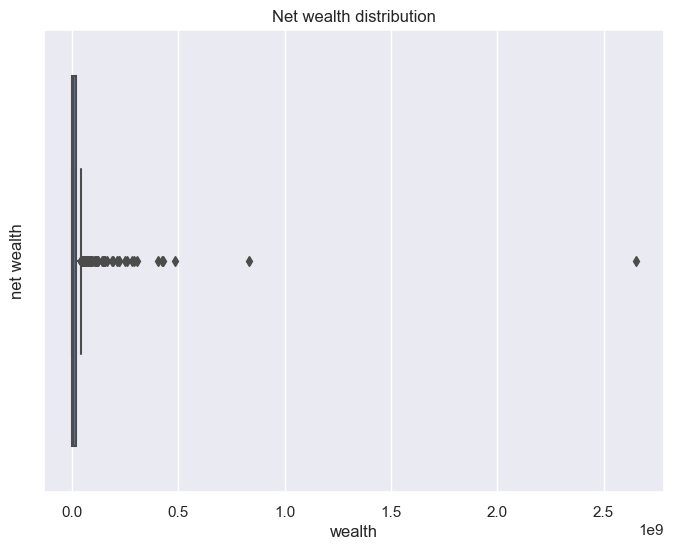

In [5]:
# plot distribution of net wealth 
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfa, x="wealth", ax=ax)
ax.set_title('Net wealth distribution')
ax.set_ylabel('net wealth')

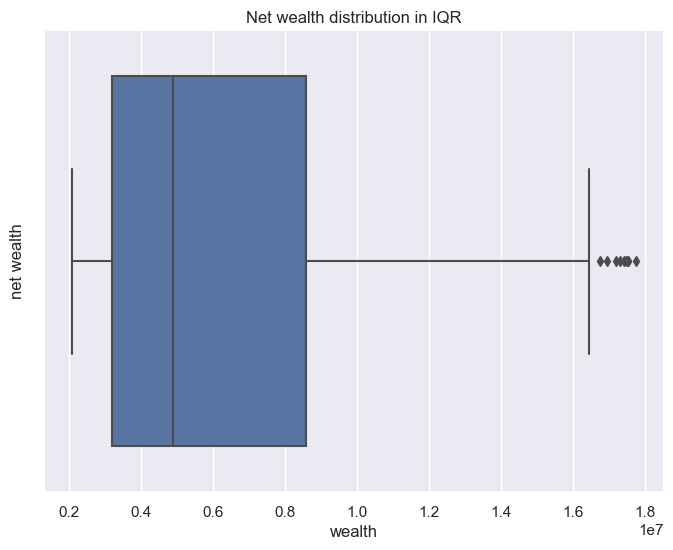

In [6]:
# plot distribution of net wealth in inter quartile range
Q1 = dfa['wealth'].quantile(0.25)
Q3 = dfa['wealth'].quantile(0.75)
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfa[(dfa.wealth > Q1) & (dfa.wealth < Q3)], x="wealth", ax=ax)
ax.set_title('Net wealth distribution in IQR')
ax.set_ylabel('net wealth')
fig.savefig('fig/affidavit_wealth_distn_iqr',bbox_inches='tight')

### top 20 wealthiest

In [7]:
# top 20 wealthiest
dfwtop = dfa.sort_values(by='wealth', ascending=False).head(20)
dfwtop = pd.merge(
    dfwtop, bdmap, how='left', left_on='constituencyID', right_on='seat_no'
)[['filename', 'name_bn', 'seat_no', 'district', 'division', 'wealth', 'income', 'tax', 'party', 'region']]
dfwtop.head()

,filename,name_bn,seat_no,district,division,wealth,income,tax,party,region
0,"12,243,এস. এ. কে একরামুজ্জামান.txt",এস. এ. কে একরামুজ্জামান,243,Brahmanbaria,Chittagong,2.650303e+09,NaN,NaN,Independent,Rural
1,"36,80,মাহমুদ হাসান খান.txt",মাহমুদ হাসান খান,80,Chuadanga,Khulna,8.320234e+08,48377626.0,9440673.0,BNP,Rural
2,"52,198,মোঃ আজম খান.txt",মোঃ আজম খান,198,Gazipur,Dhaka,4.862532e+08,3394953.0,731507.0,Janatar Dol,Rural
3,"13,263,মোঃ আবদুল হান্নান.txt",মোঃ আবদুল হান্নান,263,Chandpur,Chittagong,4.259773e+08,3745049.0,901891.0,Independent,Rural
4,"51,171,মোঃ আব্দুল্লাহ্.txt",মোঃ আব্দুল্লাহ্,171,Munshiganj,Dhaka,4.251111e+08,22460185.0,8193972.0,BNP,Rural


In [9]:
dfwtop.to_csv('dataout/affidavit_top20_wealthiest.csv', index=False)

In [8]:
dfwtop.party.value_counts()

party
BNP            10
Independent     8
Janatar Dol     1
Jamaat          1
Name: count, dtype: int64

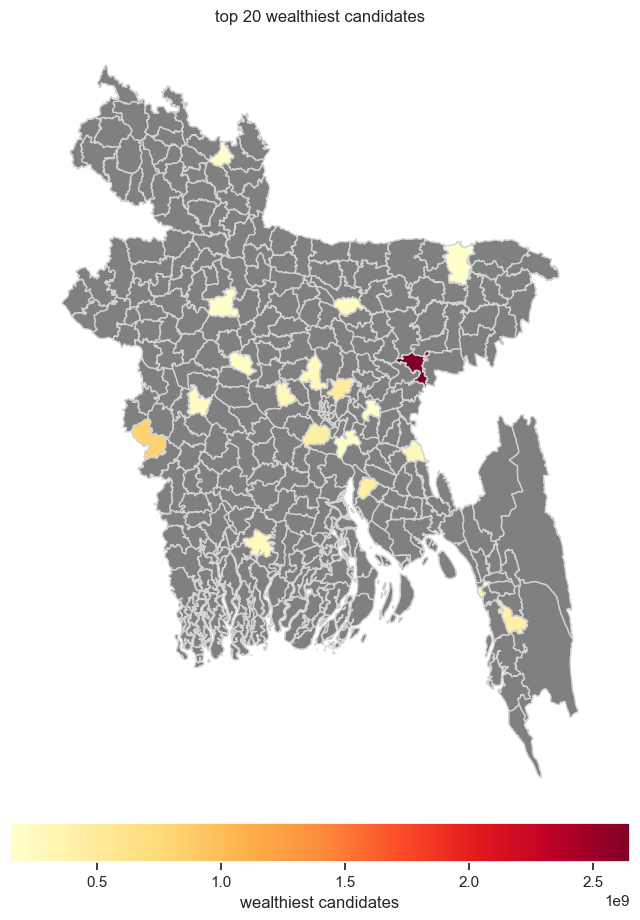

In [12]:
# plot map of top wealthiest
map_wtop = pd.merge(bdmap, dfwtop[['name_bn', 'seat_no', 'wealth', 'income', 'tax', 'party']], how='left', on='seat_no')

fig, ax = plt.subplots(figsize=(8, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

map_wtop.plot(
    column='wealth', 
    cmap='YlOrRd', 
    edgecolor='lightgrey',
    legend=True,
    ax=ax,
    cax=cax,
    missing_kwds={
        "color": "grey",
        "label": "missing data",
    }, 
    legend_kwds={
    'label': 'wealthiest candidates',
    'orientation': 'horizontal'
    },
)
ax.set_axis_off()
ax.title.set_text("top 20 wealthiest candidates")

### comparison of top 20 wealthiest vs rest

In [13]:
dfwnottop = dfa[~dfa['filename'].isin(dfwtop['filename'].tolist())]
dfwnottop.shape

(2426, 8)

In [15]:
wtop_med = dfwtop.dropna()[['wealth', 'income', 'tax']].median()
wnottop_med = dfwnottop.dropna()[['wealth', 'income', 'tax']].median()

dfw_med = pd.concat([wtop_med, wnottop_med]).reset_index()
dfw_med.columns = ['metric', 'value']
dfw_med['category'] = ['top']*3 + ['nottop']*3
dfw_med

,metric,value,category
0,wealth,223527632.0,top
1,income,12579365.0,top
2,tax,4098730.0,top
3,wealth,4749706.0,nottop
4,income,480000.0,nottop
5,tax,6503.0,nottop


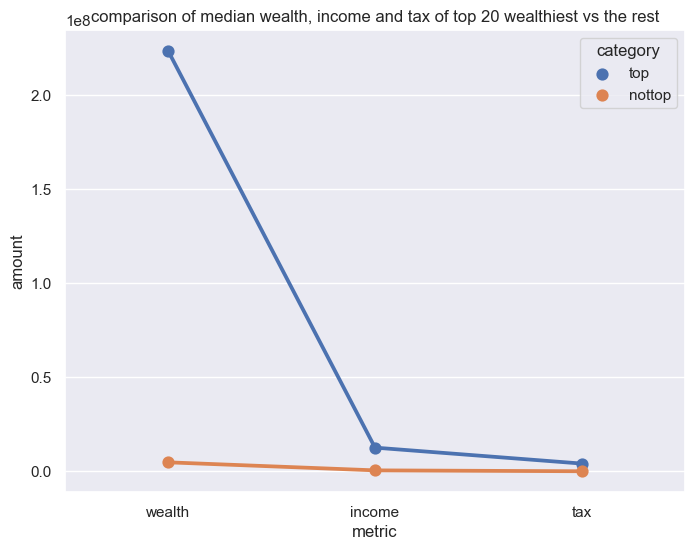

In [16]:
# plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(data=dfw_med, x="metric", y="value", hue="category")
ax.set_title('comparison of median wealth, income and tax of top 20 wealthiest vs the rest')
ax.set_ylabel('amount')
fig.savefig('fig/affidavit_wealth_top20_vs_rest',bbox_inches='tight')

Text(0, 0.5, 'amount')

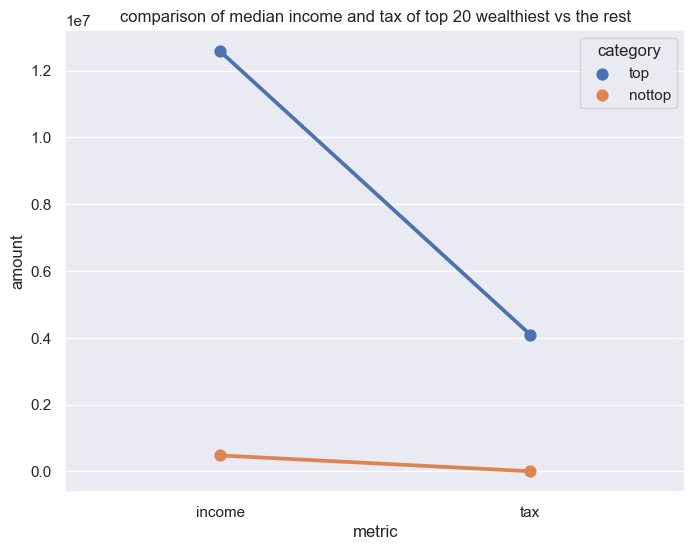

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(data=dfw_med[dfw_med['metric']!='wealth'], x="metric", y="value", hue="category")
ax.set_title('comparison of median income and tax of top 20 wealthiest vs the rest')
ax.set_ylabel('amount')

### top wealthiest vs top net income vs top taxpayer 

In [18]:
wtop_med = dfwtop.dropna()[['wealth', 'income', 'tax']].median()
ptop_med = dfa[['wealth', 'income', 'tax']].dropna().sort_values(by='tax', ascending=False).head(20).median()
stop_med = dfa[['wealth', 'income', 'tax']].dropna().sort_values(by='income', ascending=False).head(20).median()

dfwp_med = pd.concat([wtop_med, ptop_med, stop_med]).reset_index()
dfwp_med.columns = ['metric', 'value']
dfwp_med['category'] = ['top wealthiest']*3 + ['top taxpayer']*3 + ['top net income']*3
dfwp_med

,metric,value,category
0,wealth,223527632.0,top wealthiest
1,income,12579365.0,top wealthiest
2,tax,4098730.0,top wealthiest
3,wealth,137608238.0,top taxpayer
4,income,16861463.0,top taxpayer
5,tax,4155394.0,top taxpayer
6,wealth,103010993.0,top net income
7,income,21994353.0,top net income
8,tax,4155394.0,top net income


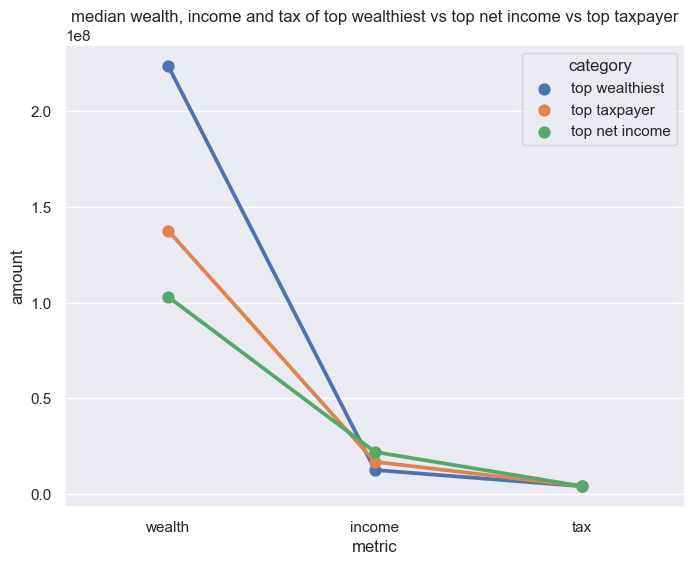

In [19]:
# plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(data=dfwp_med, x="metric", y="value", hue="category")
ax.set_title('median wealth, income and tax of top wealthiest vs top net income vs top taxpayer')
ax.set_ylabel('amount')
fig.savefig('fig/affidavit_comparison_top_wealth_income_tax',bbox_inches='tight')

### income distribution

Text(0, 0.5, 'income')

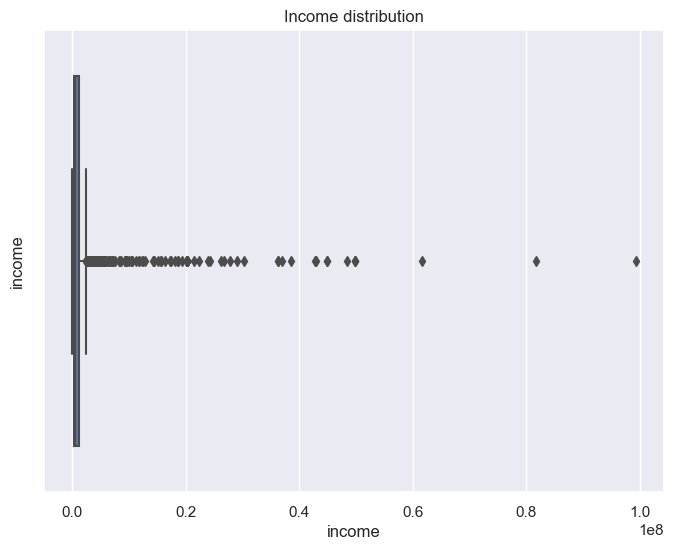

In [20]:
# plot distribution of income
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfa, x="income", ax=ax)
ax.set_title('Income distribution')
ax.set_ylabel('income')

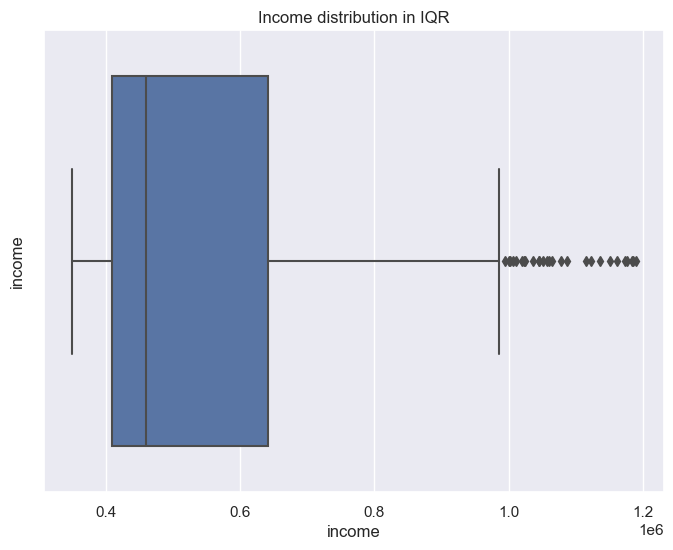

In [21]:
# plot distribution of income in inter quartile range
Q1 = dfa['income'].quantile(0.25)
Q3 = dfa['income'].quantile(0.75)
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfa[(dfa.income > Q1) & (dfa.income < Q3)], x="income", ax=ax)
ax.set_title('Income distribution in IQR')
ax.set_ylabel('income')
fig.savefig('fig/affidavit_income_distn_iqr',bbox_inches='tight')

### top 20 net income

In [22]:
# top 20 net income
dfstop = dfa.sort_values(by='income', ascending=False).head(20)
dfstop = pd.merge(
    dfstop, bdmap, how='left', left_on='constituencyID', right_on='seat_no'
)[['filename', 'name_bn', 'seat_no', 'district', 'division', 'wealth', 'income', 'tax', 'party', 'region']]
dfstop.head()

,filename,name_bn,seat_no,district,division,wealth,income,tax,party,region
0,"47,151,মোঃ কামরুল হাসান.txt",মোঃ কামরুল হাসান,151,Mymensingh,Mymensingh,NaN,99252026.0,26434.0,Jamaat,Rural
1,"8,289,মোহাম্মদ এনামুল হক.txt",মোহাম্মদ এনামুল হক,289,Chittagong,Chittagong,110433962.0,81758622.0,2422304.0,BNP,Rural
2,"17,253,মোঃ জসীম উদ্দিন.txt",মোঃ জসীম উদ্দিন,253,Comilla,Chittagong,78526845.0,61613054.0,4212058.0,BNP,Rural
3,"17,255,রেদোয়ান আহমেদ.txt",রেদোয়ান আহমেদ,255,Comilla,Chittagong,88176990.0,49833536.0,2386650.0,BNP,Rural
4,"17,255,রেদোয়ান আহমেদ.txt",রেদোয়ান আহমেদ,255,Comilla,Chittagong,88176990.0,49833536.0,2386650.0,BNP,Rural


In [24]:
dfstop.to_csv('dataout/affidavit_top20_income.csv', index=False)

In [26]:
dfstop.party.value_counts()

party
BNP            9
Independent    5
Jamaat         2
JaPa           2
JP (Manju)     1
LDP            1
Name: count, dtype: int64

### tax paid distribution

Text(0, 0.5, 'tax')

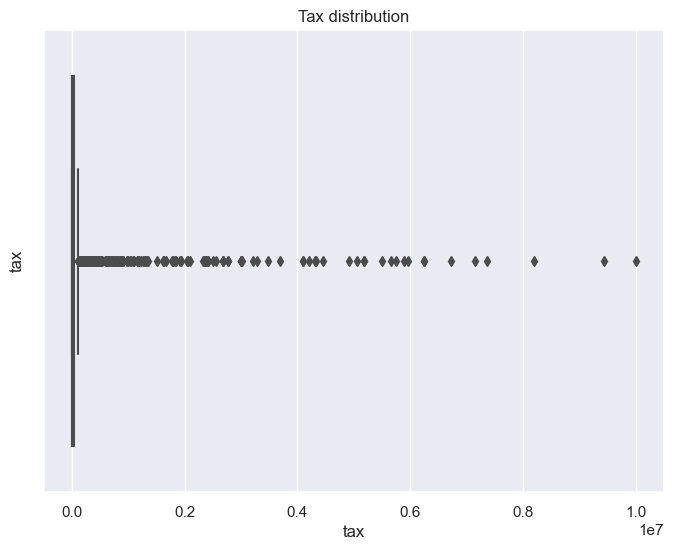

In [27]:
# plot distribution of tax
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfa, x="tax", ax=ax)
ax.set_title('Tax distribution')
ax.set_ylabel('tax')

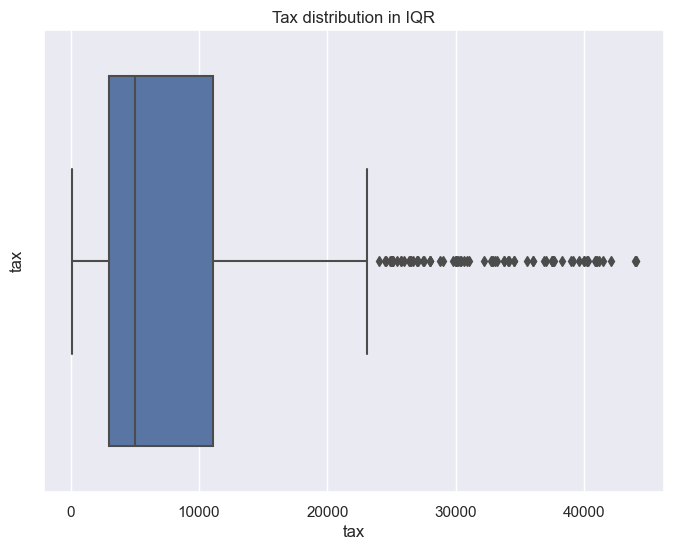

In [28]:
# plot distribution of tax in inter quartile range
Q1 = dfa['tax'].quantile(0.25)
Q3 = dfa['tax'].quantile(0.75)
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfa[(dfa.tax > Q1) & (dfa.tax < Q3)], x="tax", ax=ax)
ax.set_title('Tax distribution in IQR')
ax.set_ylabel('tax')
fig.savefig('fig/affidavit_tax_distn_iqr',bbox_inches='tight')

### top 20 taxpayer

In [29]:
# top 20 taxpayer
dfptop = dfa.sort_values(by='tax', ascending=False).head(20)
dfptop = pd.merge(
    dfptop, bdmap, how='left', left_on='constituencyID', right_on='seat_no'
)[['filename', 'name_bn', 'seat_no', 'district', 'division', 'wealth', 'income', 'tax', 'party', 'region']]
dfptop.head()

,filename,name_bn,seat_no,district,division,wealth,income,tax,party,region
0,"8,288,আমির খসরু মাহমুদ চৌধুরী.txt",আমির খসরু মাহমুদ চৌধুরী,288,Chittagong,Chittagong,NaN,NaN,10000000.0,BNP,Urban
1,"36,80,মাহমুদ হাসান খান.txt",মাহমুদ হাসান খান,80,Chuadanga,Khulna,832023433.0,48377626.0,9440673.0,BNP,Rural
2,"51,171,মোঃ আব্দুল্লাহ্.txt",মোঃ আব্দুল্লাহ্,171,Munshiganj,Dhaka,425111112.0,22460185.0,8193972.0,BNP,Rural
3,"31,59,সাবিনা ইয়াসমিন.txt",সাবিনা ইয়াসমিন,59,Natore,Rajshahi,84626872.0,23874979.0,7360496.0,Independent,Urban
4,"4,126,মোঃ মাহমুদুল ইসলাম সাগর.txt",মোঃ মাহমুদুল ইসলাম সাগর,126,Jhalokati,Barisal,NaN,NaN,7147158.0,GOP (Nuru),Urban


In [30]:
dfptop.to_csv('dataout/affidavit_top20_taxpayer.csv', index=False)

In [31]:
dfptop.party.value_counts()

party
BNP                          11
Independent                   7
GOP (Nuru)                    1
Islami Andolan Bangladesh     1
Name: count, dtype: int64

### percentage of tax paid on net income

In [32]:
dfps = dfa[['tax', 'income']].dropna()
dfps.shape

(1131, 2)

In [33]:
dfps['tax_perc'] = dfps['tax'] / dfps['income']
dfps = dfps.sort_values(by='tax_perc', ascending=False)
dfps.head()

,tax,income,tax_perc
2,5000.0,5000.0,1.0
1083,200000.0,200000.0,1.0
1393,50000.0,50000.0,1.0
1869,90000.0,90000.0,1.0
1466,3480268.0,3480268.0,1.0


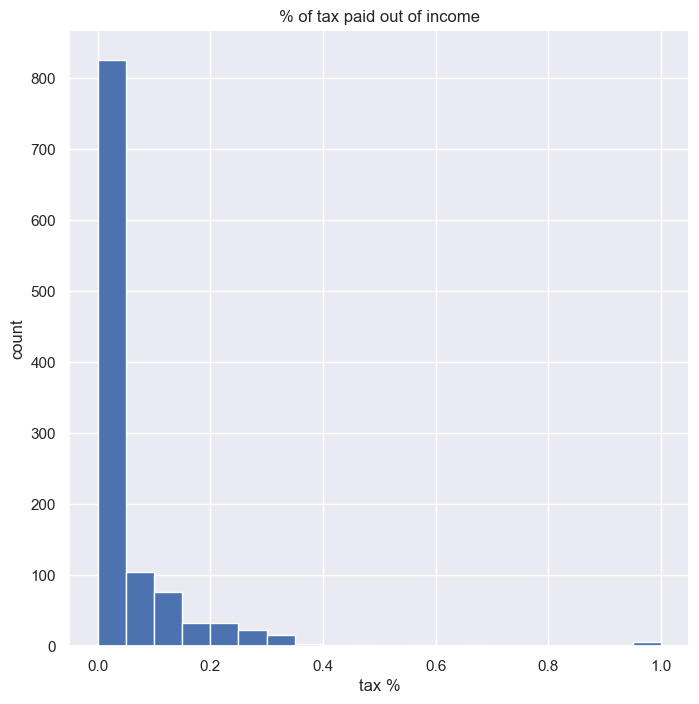

In [34]:
# plot histogram
fig, ax = plt.subplots(figsize=(8, 8))
dfps['tax_perc'].hist(bins=20, ax=ax)
ax.set_title('% of tax paid out of income')
ax.set_xlabel('tax %')
ax.set_ylabel('count')
fig.savefig('fig/affidavit_tax_perc_on_income',bbox_inches='tight')

### percentage of income shown on total wealth

In [35]:
dfsw = dfa[['income', 'wealth']].dropna()
dfsw.shape

(616, 2)

In [36]:
dfsw['income_perc'] = dfsw['income'] / dfsw['wealth']
dfsw = dfsw.sort_values(by='income_perc', ascending=False)
dfsw.head()

,income,wealth,income_perc
881,36270156.0,36845653.0,0.984381
1081,14395000.0,14764322.0,0.974986
1475,5090000.0,5232040.0,0.972852
166,4065606.0,4271000.0,0.951910
1396,486667.0,540000.0,0.901235


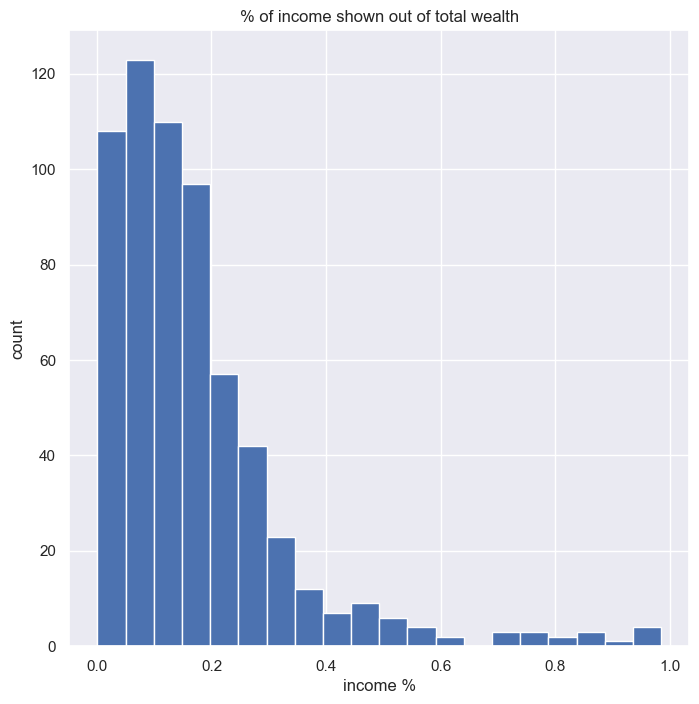

In [37]:
# plot histogram
fig, ax = plt.subplots(figsize=(8, 8))
dfsw['income_perc'].hist(bins=20, ax=ax)
ax.set_title('% of income shown out of total wealth')
ax.set_xlabel('income %')
ax.set_ylabel('count')
fig.savefig('fig/affidavit_income_perc_on_wealth',bbox_inches='tight')